<a href="https://colab.research.google.com/github/indrajitrdas/Tempus_classification/blob/master/TempusLabs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upload Data

In [0]:
from google.colab import files
uploaded = files.upload()

Saving DScasestudy.txt to DScasestudy.txt


# Import Libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
from sklearn.ensemble import AdaBoostClassifier

pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Read Data into DataFrame

In [0]:
df = pd.read_csv('DScasestudy.txt', sep='\s+')
df.shape

(530, 16563)

In [0]:
df.head(5)

,response,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,...,V16313,V16314,V16315,V16316,V16317,V16318,V16319,V16320,V16321,V16322,V16323,V16324,V16325,V16326,V16327,V16328,V16329,V16330,V16331,V16332,V16333,V16334,V16335,V16336,V16337,V16338,V16339,V16340,V16341,V16342,V16343,V16344,V16345,V16346,V16347,V16348,V16349,V16350,V16351,V16352,V16353,V16354,V16355,V16356,V16357,V16358,V16359,V16360,V16361,V16362,V16363,V16364,V16365,V16366,V16367,V16368,V16369,V16370,V16371,V16372,V16373,V16374,V16375,V16376,V16377,V16378,V16379,V16380,V16381,V16382,V16383,V16384,V16385,V16386,V16387,V16388,V16389,V16390,V16391,V16392,V16393,V16394,V16395,V16396,V16397,V16398,V16399,V16400,V16401,V16402,V16403,V16404,V16405,V16406,V16407,V16408,V16409,V16410,V16411,V16412,V16413,V16414,V16415,V16416,V16417,V16418,V16419,V16420,V16421,V16422,V16423,V16424,V16425,V16426,V16427,V16428,V16429,V16430,V16431,V16432,V16433,V16434,V16435,V16436,V16437,V16438,V16439,V16440,V16441,V16442,V16443,V16444,V16445,V16446,V16447,V16448,V16449,V16450,V16451,V16452,V16453,V16454,V16455,V16456,V16457,V16458,V16459,V16460,V16461,V16462,V16463,V16464,V16465,V16466,V16467,V16468,V16469,V16470,V16471,V16472,V16473,V16474,V16475,V16476,V16477,V16478,V16479,V16480,V16481,V16482,V16483,V16484,V16485,V16486,V16487,V16488,V16489,V16490,V16491,V16492,V16493,V16494,V16495,V16496,V16497,V16498,V16499,V16500,V16501,V16502,V16503,V16504,V16505,V16506,V16507,V16508,V16509,V16510,V16511,V16512,V16513,V16514,V16515,V16516,V16517,V16518,V16519,V16520,V16521,V16522,V16523,V16524,V16525,V16526,V16527,V16528,V16529,V16530,V16531,V16532,V16533,V16534,V16535,V16536,V16537,V16538,V16539,V16540,V16541,V16542,V16543,V16544,V16545,V16546,V16547,V16548,V16549,V16550,V16551,V16552,V16553,V16554,V16555,V16556,V16557,V16558,V16559,V16560,V16561,V16562
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1

# EDA
1. Target classes are not equally balanced
2. Synthetic Minority Over-Sampling Technique(SMOTE) can be used to prepare data for training

In [0]:
Y = df[df.columns[0]]
X = df[df.columns[1:]]
print("X Dimension = " + str(X.shape))
print("Y Dimension = " + str(Y.shape))
print("Target Class Counts")
print(Y.value_counts())
# Total number of Null Values
print("Total Null Values = " + str(df.isnull().sum().sum()))

X Dimension = (530, 16562)
Y Dimension = (530,)
Target Class Counts
0    407
1    123
Name: response, dtype: int64
Total Null Values = 0


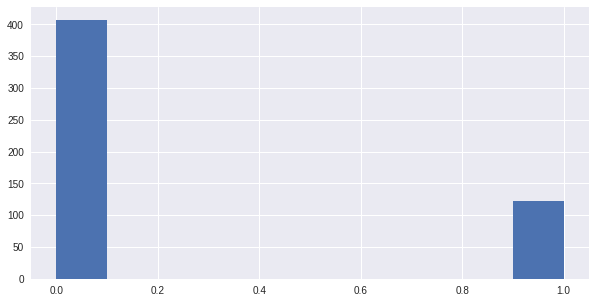

In [0]:
plt.figure(figsize=(10, 5))
plt.hist(Y)
plt.show()

# **PCA**

1. Even though I have used PCA for dimentionality reduction, I am not fully convinced that it is a good idea. Needs further investigation. 
2. Selected 528 components which is accountable for more than 99% of the variance.

In [0]:
pca = PCA()
X_pca = pca.fit_transform(X)
pca_CompVsSum = {'Components':pca.explained_variance_ratio_, 'Cumsum':pca.explained_variance_ratio_.cumsum()}
components = pd.DataFrame(pca_CompVsSum)
#Selecting the first 528 Compoments for 100% Variance
X_pca = X_pca[:,0:528]
print(X_pca.shape)

(530, 528)


# Models

**1. Logistic Regression with Feature Importance** \\
Step 1: Used ExtraTreeClassifier to select important features \\
Step 2: Used Logistic Regression with 10 fold CV for training \\
Step 3: Used Lasso since data is sparse.

In [0]:
ETC_model = ExtraTreesClassifier(n_estimators=100)
ETC_model = ETC_model.fit(X,Y)
ETC_model.feature_importances_
model = SelectFromModel(ETC_model, prefit = True)
X_FI = model.transform(X)
print(X_FI.shape)
X_train_FI, X_test_FI, Y_train_FI, Y_test_FI = train_test_split(X_FI, Y, test_size = 0.2)
model_lr = LogisticRegressionCV(penalty='l1', solver = 'liblinear', cv = 10)
model_lr.fit(X_train_FI, Y_train_FI)
Y_pred_FI = model_lr.predict(X_test_FI)
print("Accuracy with " + str(len(X_FI[1])) + " Features = " + str(metrics.accuracy_score(Y_test_FI, Y_pred_FI)))

(530, 3956)
Accuracy with 3956 Features = 0.9245283018867925


**2. Logistic Regression with PCA** \\


In [0]:
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(X_pca, Y, test_size = 0.2)
model_lr = LogisticRegressionCV(penalty='l1', solver = 'liblinear', cv = 10)
model_lr.fit(X_train_pca, Y_train_pca)
Y_pred_pca = model_lr.predict(X_test_pca)
print("Accuracy with " + str(len(X_pca[1])) + " Principal Components = " + str(metrics.accuracy_score(Y_test_pca, Y_pred_pca)))

Accuracy with 528 Principal Components = 0.8679245283018868


**3. Random Forrest with Feature Selection** \\
Step 1: Used RandomForrest to select important features \\
Step 2: Selected 100 most important features for model training

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
model_rfc = RandomForestClassifier(n_estimators=1000)
model_rfc.fit(X_train, Y_train)
Y_pred = model_rfc.predict(X_test)
from sklearn import metrics
print("Accuracy with all features = " + str(metrics.accuracy_score(Y_test, Y_pred)))
feature_imp = pd.Series(model_rfc.feature_importances_, index = X.columns).sort_values(ascending = False)
feature_imp = pd.DataFrame(feature_imp)
indexlist = feature_imp.index[0:100]
X_new = pd.DataFrame(X, columns=indexlist)
X_train_rf, X_test_rf, Y_train_rf, Y_test_rf = train_test_split(X_new, Y, test_size = 0.2)
model_rfc = RandomForestClassifier(n_estimators=1000)
model_rfc.fit(X_train_rf, Y_train_rf)
Y_pred_rf = model_rfc.predict(X_test_rf)
print("Accuracy with 100 features = " + str(metrics.accuracy_score(Y_test_rf, Y_pred_rf)))

Accuracy with all features = 0.8679245283018868
Accuracy with 100 features = 0.9433962264150944


**4. Deep Neural Net using Keras/Tensorflow**

In [0]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import keras
from keras.optimizers import SGD
classifier = Sequential()

#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2) 

classifier.add(Dense(output_dim = 64, init = 'uniform', activation = 'relu', input_dim = 100))
# Adding the second hidden layer
classifier.add(Dense(output_dim = 64, init = 'uniform', activation = 'relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.fit(X_train_rf, Y_train_rf, batch_size = 5, nb_epoch = 100)
test_loss, test_acc = classifier.evaluate(X_test_rf, Y_test_rf)
test_acc

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=100, units=64, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=64, kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
424/424 [==============================] - 1s 2ms/step - loss: 0.6190 - acc: 0.7830
Epoch 2/100
424/424 [==============================] - 0s 255us/step - loss: 0.3960 - acc: 0.8774
Epoch 3/100
424/424 [==============================] - 0s 259us/step - loss: 0.3445 - acc: 0.8703
Epoch 4/100
424/424 [==============================] - 0s 251us/step - loss: 0.2936 - acc: 0.9057
Epoch 5/100
424/424 [==============================] - 0s 273us/step - loss: 0.2531 - acc: 0.9175
Epoch 6/100
424/424 [==============================] - 0s 265us/step - loss: 0.2271 - acc: 0.9269
Epoch 7/100
424/424 [==============================] - 0s 264us/step - loss: 0.2028 - acc: 0.9292
Epoch 8/100
424/424 [==============================] - 0s 258us/step - loss: 0.1730 - acc: 0.9481
Epoch 9/100
424/424 [==============================] - 0s 265us/step - loss: 0.1491 - acc: 0.9599
Epoch 10/100
424/424 [==============================] - 0s 248us/step - loss: 0.1323 - acc: 0.9670
Epoch 11/100
424/424 

0.8867924539548047

# **CONCLUSION AND OBSERVATION**

  1. Random Forrests with 100 features selected wrt feature importance gives the highest accuracy
  2. Dimentionality reduction needs further analysis. Autoencoders can yeild better results but might need more data
  3. Accuracy : As of now I have used accuracy for measuring the performance of the models. However precision, recall and f1-score are the preferred metrics
  4. The target class is unbalanced. Use of SMOTE or other specific sampling techniques can help with better accuracy.
  5. GridSearch can be used to select best possible combination of hypermaters.